In [3]:
import pandas as pd
import numpy as np
from arch import arch_model

# Load historical stock price data for all 15 companies into a dictionary
# Replace 'stock_data' with your actual data source, which can be a dictionary of DataFrames
stock_data = {
    'Asian_Paints': pd.read_csv('../ArchGarchDatasets/AsianPaints.csv', index_col=0),
    'Bharat_Petroleum': pd.read_csv('../ArchGarchDatasets/BharatPetroleum.csv', index_col=0),
    'Britannia':pd.read_csv('../ArchGarchDatasets/Britannia Industries.csv',index_col=0),
    'Cipla':pd.read_csv('../ArchGarchDatasets/Cipla.csv',index_col=0),
    'Coal_India':pd.read_csv('../ArchGarchDatasets/CoalIndia.csv',index_col=0),
    'Dr_Reddy':pd.read_csv('../ArchGarchDatasets/DrReddy.csv',index_col=0),
    'Eicher':pd.read_csv('../ArchGarchDatasets/Eicher Motors.csv',index_col=0),
    'HDFC_Bank': pd.read_csv('../ArchGarchDatasets/HdfcBank.csv', index_col=0),
    'Hero_Motocorp':pd.read_csv('../ArchGarchDatasets/HeroMotocorp.csv',index_col=0),
    'Hindalco':pd.read_csv('../ArchGarchDatasets/Hindalco.csv',index_col=0),
    'Hindustan_Unilever':pd.read_csv('../ArchGarchDatasets/HindustanUnilever.csv',index_col=0),
    'Infosys': pd.read_csv('../ArchGarchDatasets/Infosys.csv', index_col=0),
    'JSW_Steel':pd.read_csv('../ArchGarchDatasets/Jswsteel.csv', index_col=0),
    'Kotak_Mahindra':pd.read_csv('../ArchGarchDatasets/KotakMahindra.csv', index_col=0),
    "L&T":pd.read_csv('../ArchGarchDatasets/L&T.csv',index_col=0),
    'Nestle':pd.read_csv('../ArchGarchDatasets/Nestle.csv', index_col=0),
    'NTPC':pd.read_csv('../ArchGarchDatasets/NTPC.csv', index_col=0),
    'ONGC':pd.read_csv('../ArchGarchDatasets/ONGC.csv', index_col=0),
    'PowerGrid_corp':pd.read_csv('../ArchGarchDatasets/PowerGrid.csv', index_col=0),
    'Reliance_Industries':pd.read_csv('../ArchGarchDatasets/RelianceIndustries.csv', index_col=0),
    'SBI': pd.read_csv('../ArchGarchDatasets/SbiBank.csv', index_col=0),
    'Tata_Motors':pd.read_csv('../ArchGarchDatasets/TataMotors.csv', index_col=0),
    'Tata_Steel':pd.read_csv('../ArchGarchDatasets/TataSteel.csv', index_col=0),
    'Wipro':pd.read_csv('../ArchGarchDatasets/Wipro.csv', index_col=0),
}
def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q,rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value=p
                q_value=q

    return best_aic, best_order,p_value,q_value

# Dictionary to store calculated volatilities for each company
volatility_results = {}

# Loop over each company's stock price data
actual_volatilities={}
thresholded_stocks = []
threshold = 0.05  # Define threshold for volatility

for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  
    rescaled_returns=returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order,p_value,q_value = select_best_order(rescaled_returns)
    print("Best AIC for:",company, best_aic)
    print("Best Order (p, q):", best_order)
    
    # Fit GARCH model
    model = arch_model(rescaled_returns, vol='Garch', p=p_value, q=q_value,rescale=False)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity

    # Forecast volatility for the next 1 day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    # Store the result in the dictionary
    volatility_results[company] = forecast_volatility

# Print the dictionary containing calculated volatilities for each company
volatilities={}
for company, volatility in volatility_results.items():
        if volatility <= threshold:
            thresholded_stocks.append(company)
print("Forecasted Volatility Results:")
for company, volatility in volatility_results.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")
print("Actual Volatility Results:")
for company, volatility in actual_volatilities.items():
    actual_volatilities[company]=volatility
    print(f"{company}: {volatility}")

# Display thresholded stocks
print("Stocks below volatility threshold:")
print(thresholded_stocks)

# # print(volatilities)
# print("Companies with insignificant parameters:", significant_companies)
# print("Companies with significant parameters:", insignificant_companies)




Best AIC for: Asian_Paints -1635.745356969511
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Bharat_Petroleum -1458.7546610362697
Best Order (p, q): (2, 1)
Best AIC for: Britannia -1646.4158521778777
Best Order (p, q): (2, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Cipla -1479.0688697309606
Best Order (p, q): (2, 4)
Best AIC for: Coal_India -1311.0624426005265
Best Order (p, q): (2, 3)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Dr_Reddy -1593.302830321587
Best Order (p, q): (1, 3)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Eicher -1330.8181363862655
Best Order (p, q): (1, 1)
Best AIC for: HDFC_Bank -1592.4503949445682
Best Order (p, q): (2, 2)
Best AIC for: Hero_Motocorp -1349.7699624917186
Best Order (p, q): (1, 1)
Best AIC for: Hindalco -1411.8068226856303
Best Order (p, q): (1, 1)
Best AIC for: Hindustan_Unilever -1642.3638295696073
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: Infosys -1486.3446709494624
Best Order (p, q): (4, 1)
Best AIC for: JSW_Steel -1534.5890690325255
Best Order (p, q): (1, 1)
Best AIC for: Kotak_Mahindra -1501.5978946297066
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: L&T -1415.6218565917966
Best Order (p, q): (1, 1)
Best AIC for: Nestle -1506.4688971406501
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: NTPC -1380.63603913122
Best Order (p, q): (2, 2)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best AIC for: ONGC -1367.9615100378237
Best Order (p, q): (1, 1)
Best AIC for: PowerGrid_corp -1369.7711927116052
Best Order (p, q): (1, 1)
Best AIC for: Reliance_Industries -1592.7160203968256
Best Order (p, q): (2, 1)
Best AIC for: SBI -1525.2242711182569
Best Order (p, q): (1, 1)
Best AIC for: Tata_Motors -1364.6903537756134
Best Order (p, q): (1, 1)
Best AIC for: Tata_Steel -1508.5406765045084
Best Order (p, q): (1, 1)


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Best AIC for: Wipro -1404.4598178795688
Best Order (p, q): (1, 2)
Forecasted Volatility Results:
Asian_Paints: 0.01068319176043105
Bharat_Petroleum: 0.01691802398400044
Britannia: 0.009760031758591754
Cipla: 0.012940792819500403
Coal_India: 0.022731199815691428
Dr_Reddy: 0.013870433434172859
Eicher: 0.015325829825893086
HDFC_Bank: 0.01310097761731082
Hero_Motocorp: 0.0161331089920088
Hindalco: 0.015719356685065005
Hindustan_Unilever: 0.012158764292309459
Infosys: 0.011251837826624641
JSW_Steel: 0.013345322603930837
Kotak_Mahindra: 0.011229295673166134
L&T: 0.013646839246624201
Nestle: 0.010670751307461234
NTPC: 0.01765283393116566
ONGC: 0.01519874177649771
PowerGrid_corp: 0.020542923655907767
Reliance_Industries: 0.030008067315138526
SBI: 0.013620858958666023
Tata_Motors: 0.014573578265695962
Tata_Steel: 0.012962166062332636
Wipro: 0.018508545328969287
Actual Volatility Results:
Asian_Paints: 0.00011588706893283964
Bharat_Petroleum: 0.0002318059098691329
Britannia: 0.000112589186786173

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


GARCH MODEL CODE

In [1]:
import pandas as pd
import numpy as np
from arch import arch_model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load historical stock price data for all 25 companies into a dictionary
# Replace 'stock_data' with your actual data source, which can be a dictionary of DataFrames
stock_data = {
    'Asian_Paints': pd.read_csv('../ArchGarchDatasets/AsianPaints.csv', index_col=0),
    'Bharat_Petroleum': pd.read_csv('../ArchGarchDatasets/BharatPetroleum.csv', index_col=0),
    'Britannia': pd.read_csv('../ArchGarchDatasets/Britannia Industries.csv', index_col=0),
    'Cipla': pd.read_csv('../ArchGarchDatasets/Cipla.csv', index_col=0),
    'Coal_India': pd.read_csv('../ArchGarchDatasets/CoalIndia.csv', index_col=0),
    'Dr_Reddy': pd.read_csv('../ArchGarchDatasets/DrReddy.csv', index_col=0),
    'Eicher': pd.read_csv('../ArchGarchDatasets/Eicher Motors.csv', index_col=0),
    'HDFC_Bank': pd.read_csv('../ArchGarchDatasets/HdfcBank.csv', index_col=0),
    'Hero_Motocorp': pd.read_csv('../ArchGarchDatasets/HeroMotocorp.csv', index_col=0),
    'Hindalco': pd.read_csv('../ArchGarchDatasets/Hindalco.csv', index_col=0),
    'Hindustan_Unilever': pd.read_csv('../ArchGarchDatasets/HindustanUnilever.csv', index_col=0),
    'Infosys': pd.read_csv('../ArchGarchDatasets/Infosys.csv', index_col=0),
    'JSW_Steel': pd.read_csv('../ArchGarchDatasets/Jswsteel.csv', index_col=0),
    'Kotak_Mahindra': pd.read_csv('../ArchGarchDatasets/KotakMahindra.csv', index_col=0),
    "L&T": pd.read_csv('../ArchGarchDatasets/L&T.csv', index_col=0),
    'Nestle': pd.read_csv('../ArchGarchDatasets/Nestle.csv', index_col=0),
    'NTPC': pd.read_csv('../ArchGarchDatasets/NTPC.csv', index_col=0),
    'ONGC': pd.read_csv('../ArchGarchDatasets/ONGC.csv', index_col=0),
    'PowerGrid_corp': pd.read_csv('../ArchGarchDatasets/PowerGrid.csv', index_col=0),
    'Reliance_Industries': pd.read_csv('../ArchGarchDatasets/RelianceIndustries.csv', index_col=0),
    'SBI': pd.read_csv('../ArchGarchDatasets/SbiBank.csv', index_col=0),
    'Tata_Motors': pd.read_csv('../ArchGarchDatasets/TataMotors.csv', index_col=0),
    'Tata_Steel': pd.read_csv('../ArchGarchDatasets/TataSteel.csv', index_col=0),
    'Wipro': pd.read_csv('../ArchGarchDatasets/Wipro.csv', index_col=0),
}

def select_best_order(returns):
    best_aic = np.inf  # Initialize with a very large value
    best_order = None

    # Loop over potential values of p and q
    for p in range(1, 6):  # Maximum lag order for ARCH model
        for q in range(1, 6):  # Maximum lag order for GARCH model
            # Fit ARCH/GARCH model with current p and q values
            model = arch_model(returns, vol='Garch', p=p, q=q, rescale=False)
            result = model.fit(disp='off')  # Suppress output for simplicity
            
            # Calculate AIC
            aic = result.aic
            
            # Check if current AIC is the best so far
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                p_value = p
                q_value = q

    return best_aic, best_order, p_value, q_value

# Dictionary to store calculated volatilities for each company
volatility_results = {}

# Loop over each company's stock price data
actual_volatilities = {}
thresholded_stocks = []
threshold = 0.05  # Define threshold for volatility

for company, data in stock_data.items():
    # Calculate returns
    returns = data['Close'].pct_change().dropna()  
    rescaled_returns = returns
    squared_diff = rescaled_returns ** 2
    actual_volatilities[company] = squared_diff.mean()
    best_aic, best_order, p_value, q_value = select_best_order(rescaled_returns)
    # print("Best AIC for:", company, best_aic)
    # print("Best Order (p, q):", best_order)
    
    # Fit GARCH model
    model = arch_model(rescaled_returns, vol='Garch', p=p_value, q=q_value, rescale=False)
    fitted_model = model.fit(disp='off')  # Suppress output for simplicity

    # Forecast volatility for the next 1 day
    forecast = fitted_model.forecast(horizon=1)
    forecast_volatility = np.sqrt(forecast.variance.iloc[-1].values[0])
    
    # Store the result in the dictionary
    volatility_results[company] = forecast_volatility

# Perform clustering on the forecasted volatilities
forecasted_volatilities = np.array(list(volatility_results.values())).reshape(-1, 1)
# num_clusters = 3  # Define the number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# cluster_labels = kmeans.fit_predict(forecasted_volatilities)
min_k = 3
max_k = 5

silhouette_scores = []

# Compute silhouette score for each k
for k in range(min_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(forecasted_volatilities)
    silhouette_avg = silhouette_score(forecasted_volatilities, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + min_k
print("Optimal number of clusters (k):", optimal_k)
print(silhouette_scores)

# Print the cluster labels for each company
# # print("Clustering Results:")
# for i, (company, volatility) in enumerate(volatility_results.items()):
#     cluster_label = cluster_labels[i]
#     print(f"{company}: Forecasted Volatility={volatility}, Cluster={cluster_label}")

# Print the companies belonging to each cluster
# for cluster in range(optimal_k):
#     companies_in_cluster = [company for i, (company, label) in enumerate(volatility_results.items()) if cluster_labels[i] == cluster]
#     print(f"Companies in Cluster {cluster}: {companies_in_cluster}")




C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for lines

Optimal number of clusters (k): 5
[0.5201306510378639, 0.5267164012567901, 0.5573458174637279]


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


SILHOUETTE SCORE PLOT

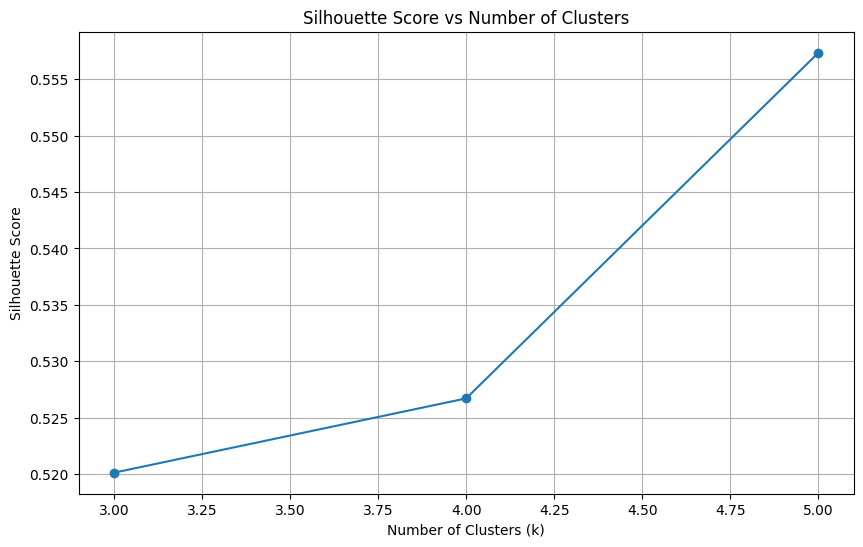

In [5]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(min_k, max_k + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()


VOLATILITY AND CLUSTER VALUES

In [6]:
forecasted_volatilities = np.array(list(volatility_results.values())).reshape(-1, 1)
num_clusters = optimal_k  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(forecasted_volatilities)

# Print the cluster labels for each company
print("Clustering Results:")
for i, (company, volatility) in enumerate(volatility_results.items()):
    cluster_label = cluster_labels[i]
    print(f"{company}: Forecasted Volatility={volatility}, Cluster={cluster_label}")

# Print the companies belonging to each cluster
for cluster in range(num_clusters):
    companies_in_cluster = [company for i, (company, label) in enumerate(volatility_results.items()) if cluster_labels[i] == cluster]
    print(f"Companies in Cluster {cluster}: {companies_in_cluster}")

Clustering Results:
Asian_Paints: Forecasted Volatility=0.01068319176043105, Cluster=1
Bharat_Petroleum: Forecasted Volatility=0.01691802398400044, Cluster=2
Britannia: Forecasted Volatility=0.009760031758591754, Cluster=1
Cipla: Forecasted Volatility=0.012940792819500403, Cluster=4
Coal_India: Forecasted Volatility=0.022731199815691428, Cluster=0
Dr_Reddy: Forecasted Volatility=0.013870433434172859, Cluster=4
Eicher: Forecasted Volatility=0.015325829825893086, Cluster=2
HDFC_Bank: Forecasted Volatility=0.01310097761731082, Cluster=4
Hero_Motocorp: Forecasted Volatility=0.0161331089920088, Cluster=2
Hindalco: Forecasted Volatility=0.015719356685065005, Cluster=2
Hindustan_Unilever: Forecasted Volatility=0.012158764292309459, Cluster=4
Infosys: Forecasted Volatility=0.011251837826624641, Cluster=1
JSW_Steel: Forecasted Volatility=0.013345322603930837, Cluster=4
Kotak_Mahindra: Forecasted Volatility=0.011229295673166134, Cluster=1
L&T: Forecasted Volatility=0.013646839246624201, Cluster=

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


PLOTS FOR CLUSTERS

clustered_companies {0: ['Coal_India', 'PowerGrid_corp'], 1: ['Asian_Paints', 'Britannia', 'Infosys', 'Kotak_Mahindra', 'Nestle'], 2: ['Bharat_Petroleum', 'Eicher', 'Hero_Motocorp', 'Hindalco', 'NTPC', 'ONGC', 'Wipro'], 3: ['Reliance_Industries'], 4: ['Cipla', 'Dr_Reddy', 'HDFC_Bank', 'Hindustan_Unilever', 'JSW_Steel', 'L&T', 'SBI', 'Tata_Motors', 'Tata_Steel']}


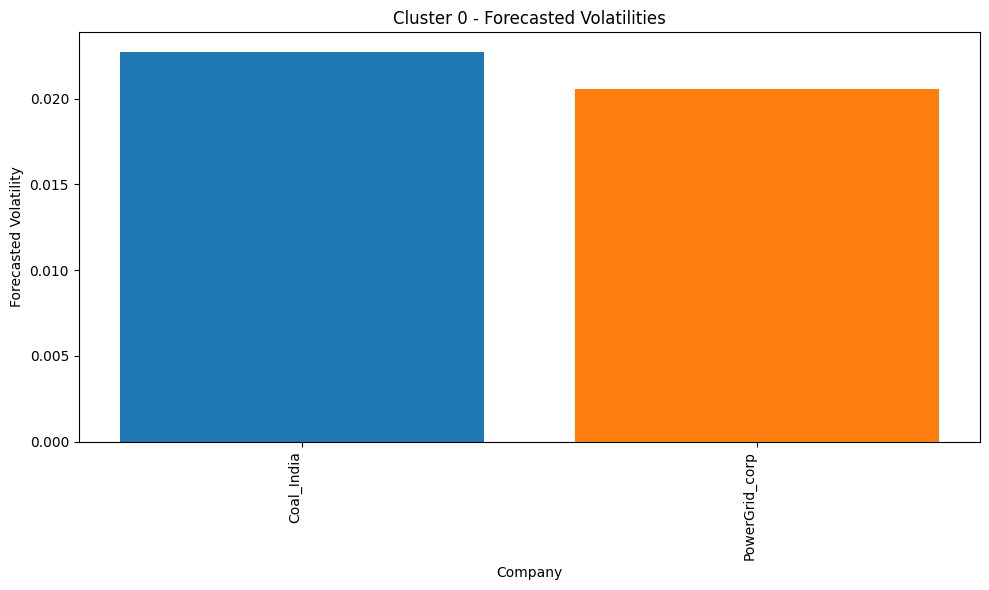

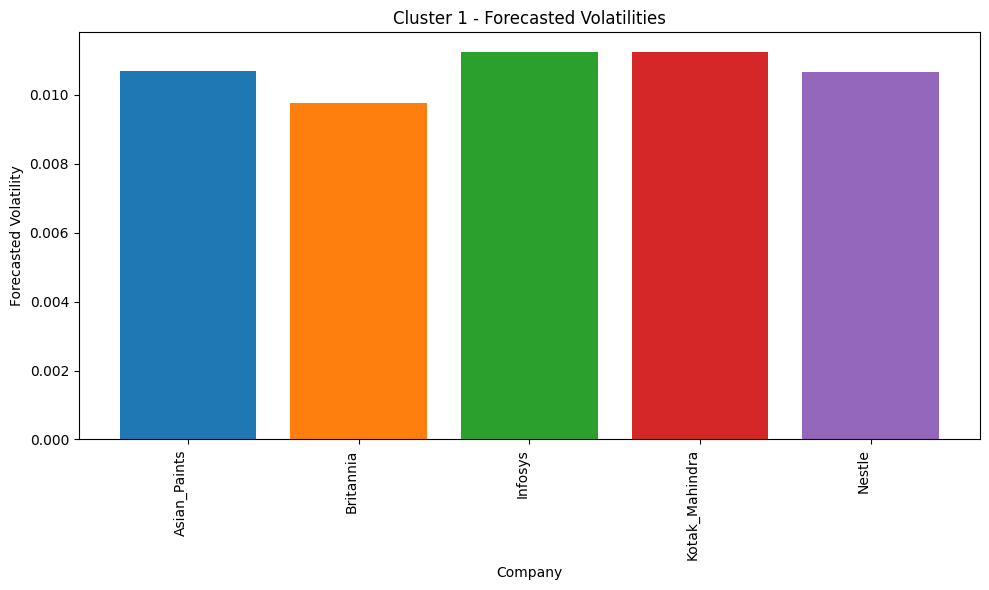

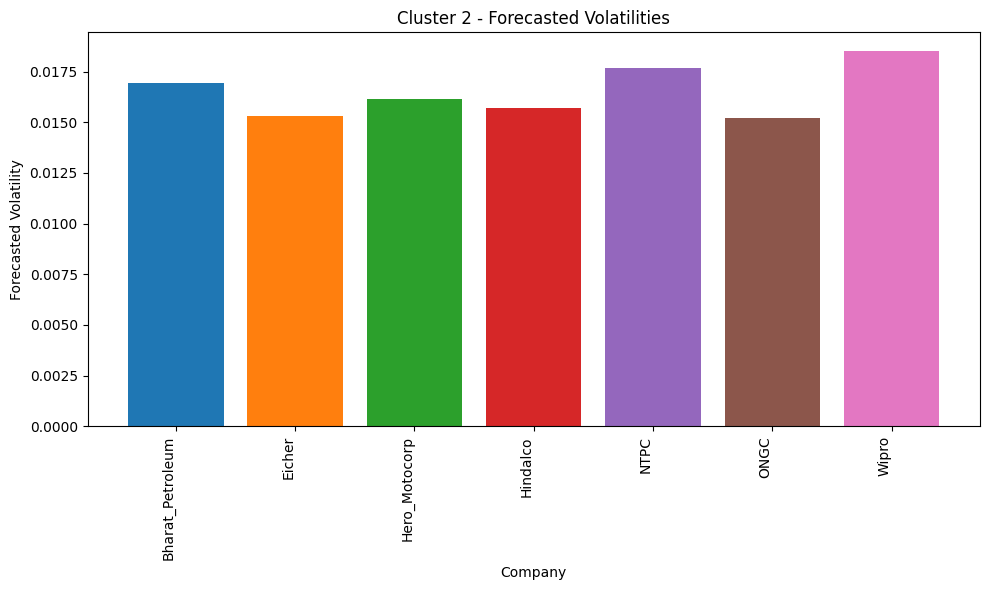

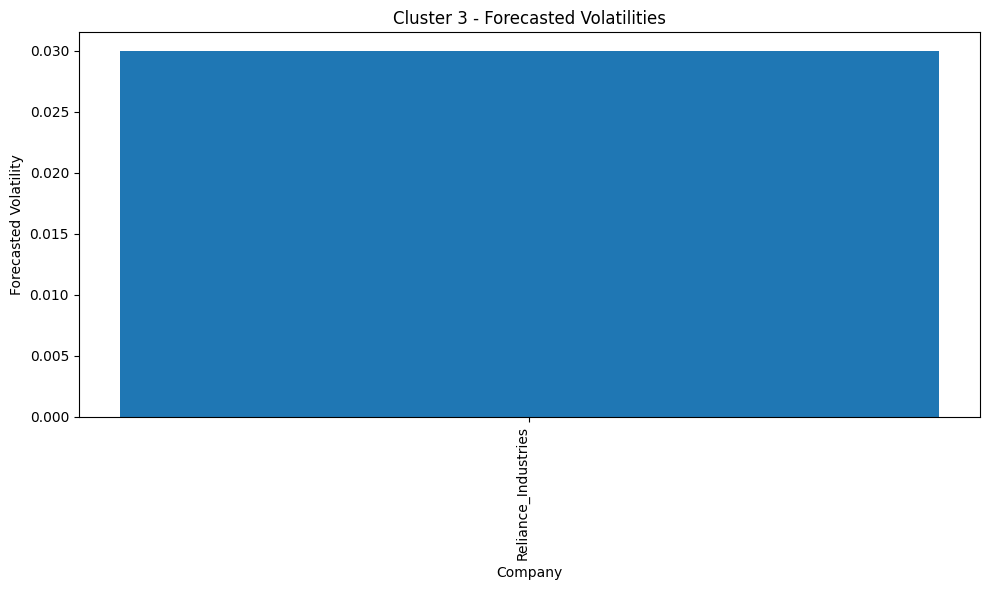

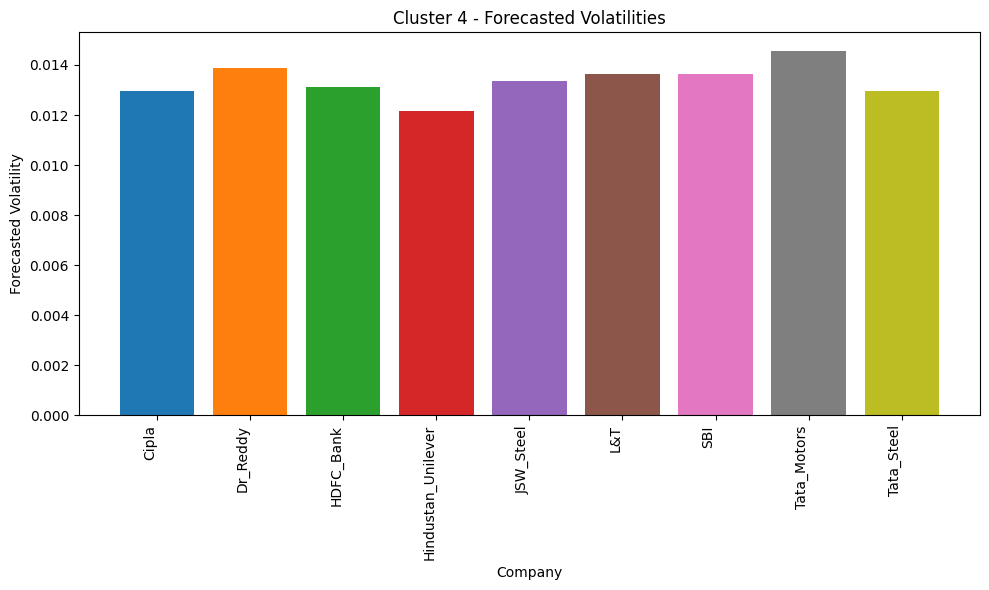

In [7]:
import matplotlib.pyplot as plt

# Create a dictionary to store companies in each cluster
clustered_companies = {cluster: [] for cluster in range(num_clusters)}
for i, (company, volatility) in enumerate(volatility_results.items()):
    cluster_label = cluster_labels[i]
    clustered_companies[cluster_label].append(company)

print("clustered_companies",clustered_companies)
# Plot forecasted volatilities for each cluster
for cluster, companies in clustered_companies.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Cluster {cluster} - Forecasted Volatilities')
    plt.xlabel('Company')
    plt.ylabel('Forecasted Volatility')
    for company in companies:
        plt.bar(company, volatility_results[company])
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()



SPLITTING OF DATA TO CLUSTERS 


In [9]:
# Initialize a dictionary to store companies in each cluster
cluster_data = {cluster: {} for cluster in range(num_clusters)}

# Populate the dictionary with company names and volatilities
for i, (company, volatility) in enumerate(volatility_results.items()):
    cluster_label = cluster_labels[i]
    cluster_data[cluster_label][company] = volatility

# # Print cluster data
# for cluster, companies in cluster_data.items():
#     print(f"Cluster {cluster}:")
#     for company, volatility in companies.items():
#         print(f"{company}: Forecasted Volatility={volatility}")

# Access data for a specific cluster (e.g., Cluster 0)
cluster_0_data = cluster_data[0]
cluster_1_data = cluster_data[1]
cluster_2_data = cluster_data[2]
cluster_3_data = cluster_data[3]
cluster_4_data = cluster_data[4]

print(cluster_0_data)
print(cluster_1_data)
print(cluster_2_data)
print(cluster_3_data)
print(cluster_4_data)


{'Coal_India': 0.022731199815691428, 'PowerGrid_corp': 0.020542923655907767}
{'Asian_Paints': 0.01068319176043105, 'Britannia': 0.009760031758591754, 'Infosys': 0.011251837826624641, 'Kotak_Mahindra': 0.011229295673166134, 'Nestle': 0.010670751307461234}
{'Bharat_Petroleum': 0.01691802398400044, 'Eicher': 0.015325829825893086, 'Hero_Motocorp': 0.0161331089920088, 'Hindalco': 0.015719356685065005, 'NTPC': 0.01765283393116566, 'ONGC': 0.01519874177649771, 'Wipro': 0.018508545328969287}
{'Reliance_Industries': 0.030008067315138526}
{'Cipla': 0.012940792819500403, 'Dr_Reddy': 0.013870433434172859, 'HDFC_Bank': 0.01310097761731082, 'Hindustan_Unilever': 0.012158764292309459, 'JSW_Steel': 0.013345322603930837, 'L&T': 0.013646839246624201, 'SBI': 0.013620858958666023, 'Tata_Motors': 0.014573578265695962, 'Tata_Steel': 0.012962166062332636}


In [10]:
# Define a list to store the returns for each company in cluster 0
returns_cluster_0 = []

# Extract returns for each company in cluster 0
for company in cluster_0_data.keys():
    returns = stock_data[company]['Close'].pct_change().dropna()
    returns_cluster_0.append(returns)

# Convert the list of returns into a numpy array for easier manipulation
returns_cluster_0 = np.array(returns_cluster_0)

# Calculate the correlation matrix
correlation_matrix_cluster_0 = np.corrcoef(returns_cluster_0)

# Print the correlation matrix
print("Correlation Matrix for Cluster 0:")
print(correlation_matrix_cluster_0)


Correlation Matrix for Cluster 0:
[[1.         0.25668678]
 [0.25668678 1.        ]]


In [1]:
print(volatilities)
for company, volatility in volatilities.items():
    volatilities[company]=volatility
    print(f"{company}: {volatility}")


NameError: name 'volatilities' is not defined

In [36]:
# import numpy as np
# rmse_per_company = {}
# for company in volatilities.keys():
#     # Calculate squared difference
#     squared_diff = (volatilities[company] - actual_volatilities[company]) ** 2
#     # Calculate RMSE
#     rmse_per_company[company] = np.sqrt(squared_diff)

# # Display RMSE for each company
# print("Root Mean Square Error Results :")
# for company, rmse in rmse_per_company.items():
#     print(f"{company}: {rmse}")

In [24]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
expected_returns = {}
for stock, volatility in cluster_0_data.items():
    beta = 1.0  # Assuming beta of 1 for simplicity
    expected_return = risk_free_rate + beta * market_risk_premium * volatility
    expected_returns[stock] = expected_return

# Display expected returns
for stock, expected_return in expected_returns.items():
    print(f"{stock}: {expected_return}")

Coal_India: 0.051818495985255314
PowerGrid_corp: 0.051643433892472626


In [101]:
final_cluster={
    'PowerGrid_corp': 0.020542923655907767,
    'Britannia': 0.009760031758591754,
    'ONGC': 0.01519874177649771,
    'Reliance_Industries': 0.030008067315138526,
    'Hindustan_Unilever': 0.012158764292309459
}

MAIN STEP OF MVO STARTS HERE

In [102]:
import numpy as np
import cvxpy as cp

num_stocks = len(final_cluster)

print(num_stocks)
weights = cp.Variable(num_stocks)
print(weights)

5
var8384


In [103]:
portfolio_volatility = cp.sqrt(cp.quad_form(weights, np.diag(list(final_cluster.values()))))
print(portfolio_volatility)

power(QuadForm(var8384, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.03 0.00]
 [0.00 0.00 ... 0.00 0.01]]), 0.5)


In [104]:
constraints = [cp.sum(weights) == 1, weights >= 0]

# Create optimization problem
problem = cp.Problem(cp.Minimize(portfolio_volatility), constraints)
print(problem)

minimize power(QuadForm(var8384, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.03 0.00]
 [0.00 0.00 ... 0.00 0.01]]), 0.5)
subject to Sum(var8384, None, False) == 1.0
           0.0 <= var8384


In [105]:
problem.solve(qcp=True)

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\cvx

0.05797693861599223

OPTIMIZED WEIGHTS

In [106]:
optimized_weights = weights.value
final_optimized_weight={}
for i, stock in enumerate(final_cluster.keys()):
    final_optimized_weight[stock]=optimized_weights[i]
    print(f"{stock}: {optimized_weights[i]}")



PowerGrid_corp: 0.1929654216550361
Britannia: 0.21475483528297212
ONGC: 0.2014063141506995
Reliance_Industries: 0.18289883408115423
Hindustan_Unilever: 0.20797459483013817


PORTFOLIO COMPOSITION & RISK CONTRIBUTION

In [107]:
# Calculate portfolio risk contribution
portfolio_risk_contribution = {stock: optimized_weights[i] * final_cluster[stock] for i, stock in enumerate(final_cluster.keys())}

# Display portfolio composition
print("Portfolio Composition:")
for stock, weight in zip(final_cluster.keys(), optimized_weights):
    print(f"{stock}: {weight * 100:.2f}%")

# Display portfolio risk contribution
print("\nPortfolio Risk Contribution:")
for stock, risk_contribution in portfolio_risk_contribution.items():
    print(f"{stock}: {risk_contribution * 100:.2f}%")

# Calculate and display total portfolio risk
portfolio_risk = sum(portfolio_risk_contribution.values())
print(f"\nTotal Portfolio Risk: {portfolio_risk * 100:.2f}%")


Portfolio Composition:
PowerGrid_corp: 19.30%
Britannia: 21.48%
ONGC: 20.14%
Reliance_Industries: 18.29%
Hindustan_Unilever: 20.80%

Portfolio Risk Contribution:
PowerGrid_corp: 0.40%
Britannia: 0.21%
ONGC: 0.31%
Reliance_Industries: 0.55%
Hindustan_Unilever: 0.25%

Total Portfolio Risk: 1.71%


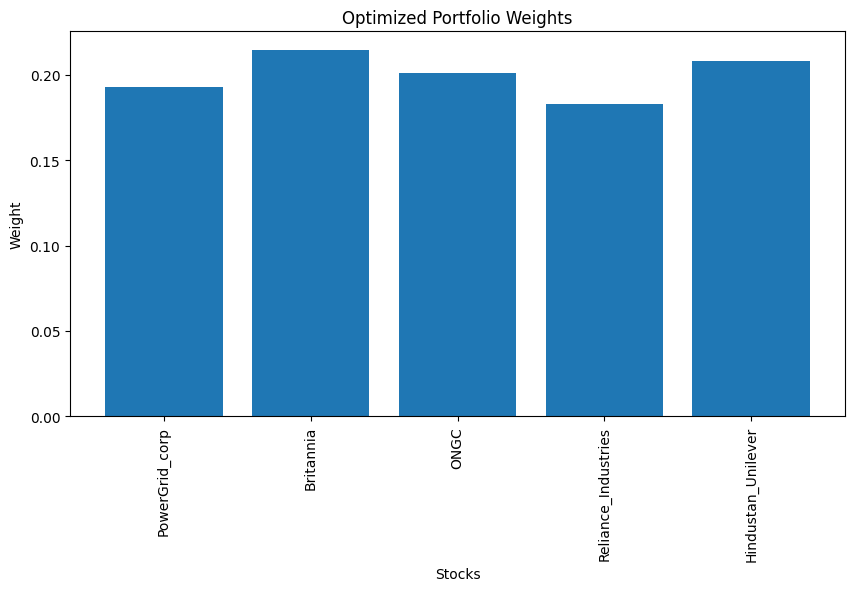

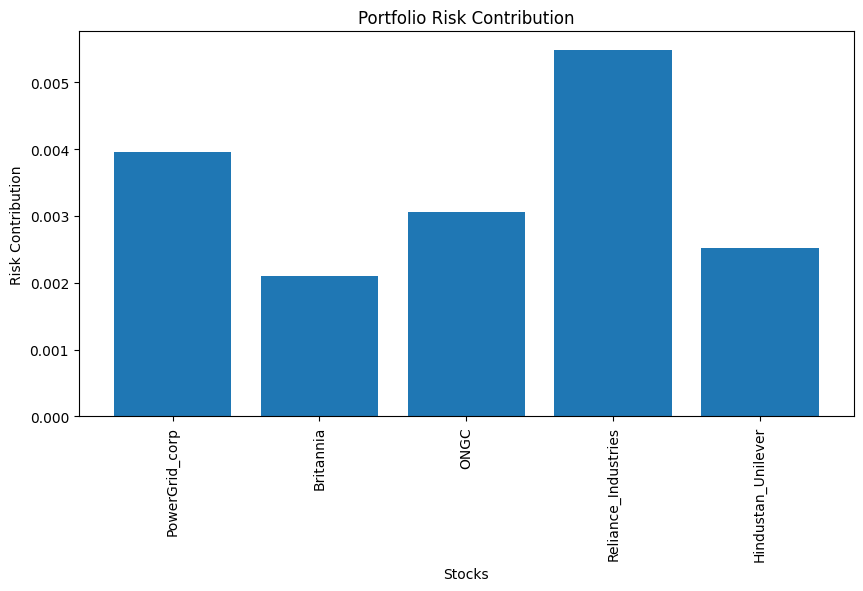

In [108]:
import matplotlib.pyplot as plt

# Plotting optimized weights
plt.figure(figsize=(10, 5))
plt.bar(final_cluster.keys(), optimized_weights)
plt.title('Optimized Portfolio Weights')
plt.xlabel('Stocks')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

# Plotting portfolio risk contribution
plt.figure(figsize=(10, 5))
plt.bar(portfolio_risk_contribution.keys(), portfolio_risk_contribution.values())
plt.title('Portfolio Risk Contribution')
plt.xlabel('Stocks')
plt.ylabel('Risk Contribution')
plt.xticks(rotation=90)
plt.show()


EXPECTED RETURNS

In [109]:
# Assuming a risk-free rate
risk_free_rate = 0.05  # 5% annual risk-free rate

# Assuming a market risk premium
market_risk_premium = 0.08  # 8% annual market risk premium

# Calculating expected returns using CAPM
expected_returns = {}
for stock, volatility in final_cluster.items():
    beta = 1.0  # Assuming beta of 1 for simplicity
    expected_return = risk_free_rate + beta * market_risk_premium * volatility
    expected_returns[stock] = expected_return

# Display expected returns
for stock, expected_return in expected_returns.items():
    print(f"{stock}: {expected_return}")


PowerGrid_corp: 0.051643433892472626
Britannia: 0.05078080254068734
ONGC: 0.05121589934211982
Reliance_Industries: 0.05240064538521109
Hindustan_Unilever: 0.05097270114338476


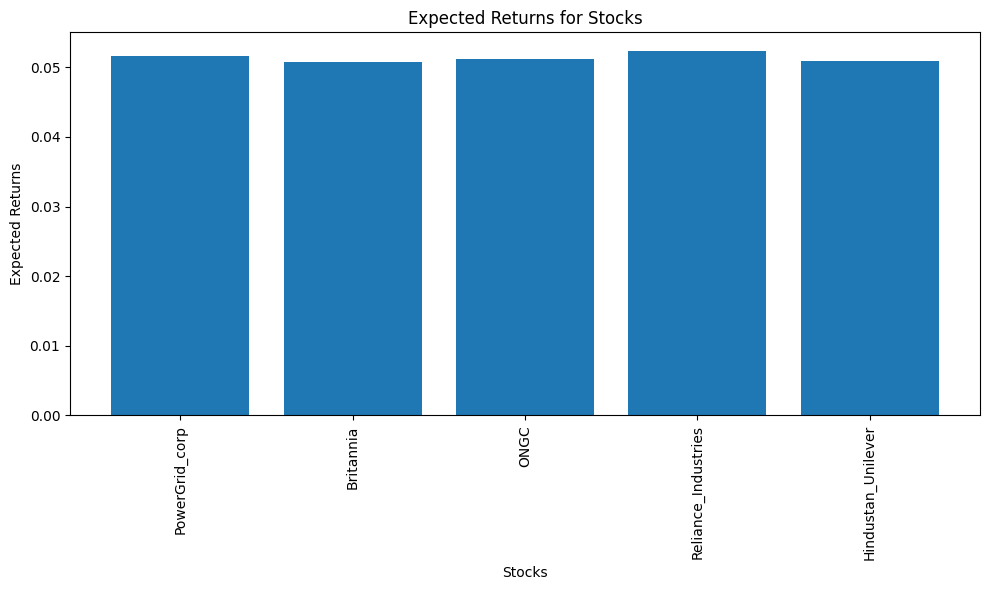

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(expected_returns.keys(), expected_returns.values())
plt.xlabel('Stocks')
plt.ylabel('Expected Returns')
plt.title('Expected Returns for Stocks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
risk_free_rate = 0.05  # 5% annual risk-free rate

# Calculate portfolio expected return
portfolio_expected_return = sum(final_optimized_weight[stock] * expected_returns[stock] for stock in final_optimized_weight)

# Calculate portfolio volatility (standard deviation)
# Assuming you have calculated portfolio volatility using covariance matrix or GARCH model
portfolio_volatility =0.01# Replace with actual portfolio volatility

# Calculate Sharpe ratio
sharpe_ratio = (portfolio_expected_return - risk_free_rate) / portfolio_volatility

print("Portfolio Expected Return:", portfolio_expected_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Portfolio Expected Return: 0.05137106920809528
Portfolio Volatility: 0.01
Sharpe Ratio: 0.13710692080952797


In [ ]:
final_cluster={
    'PowerGrid_corp': 0.020542923655907767,
    'Britannia': 0.009760031758591754,
    'ONGC': 0.01519874177649771,
    'Reliance_Industries': 0.030008067315138526,
    'Hindustan_Unilever': 0.012158764292309459
}